In [8]:
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

with open('../data/X.pkl', 'rb') as file:
    X = pickle.load(file)

with open('../data/Y.pkl', 'rb') as file:
    y = pickle.load(file)

train_length = int((7 * X.shape[0])/10)

X_train, X_test = X[:train_length], X[train_length:]
y_train, y_test = y[:train_length], y[train_length:]


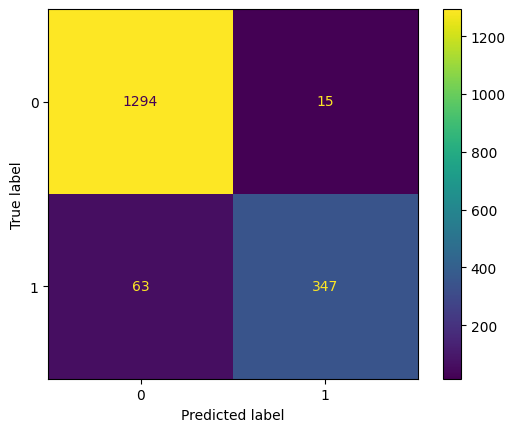

In [10]:
classificator = GaussianNB()

classificator.fit(X_train.toarray(), y_train)

predict = classificator.predict(X_test.toarray())

cm = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

accuracy_score(y_test, predict)
plt.savefig('../results/confusion_matrix_gaussian.png', format='png')